## Cleaning and Analysis of Employee Exit Surveys
___

For this project, we will be performing data cleaning using some of the tools below:

- Vectorized string methods to clean string columns
- The `apply()`, `map()`, and `applymap()` methods to transform data
- The `fillna()`, `dropna()`, and `drop()` methods to drop missing or unnecessary  values
- The `melt()` function to reshape data
- The `concat()` and `merge()` functions to combine data

We'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:

- `ID`: An id used to identify the participant of the survey
- `SeparationType`: The reason why the person's employment ended
- `Cease Date`: The year or month the person's employment ended
- `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:

- `Record ID`: An id used to identify the participant of the survey
- `Reason for ceasing employment`: The reason why the person's employment ended
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

### Goal

As we clean and analyze the data, we will try to answer the following:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We will be using both surveys to answer the above questions. However, as we've seen above, while the template used between the two is the same, one of them customized some of the answers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

# reading the survey datasets
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

### DETE Data Inspection

Below are the first few rows of the DETE dataset.

Using the `DataFrame.info()` method we can see that there are a total of 822 rows and 56 columns.

> RangeIndex: 822 entries, 0 to 821

> Data columns (total 56 columns)

Furthermore, there are columns with a lot of missing values when we explore using the `DataFrame.isnull()` method. These are some of the columns that we will be looking more closely at.

> `Torres Strait`: 819

> `South Sea`: 815

> `Aboriginal`: 806

> `Disability`: 799

> `NESB`: 790

> `Business Unit`: 696

> `Classification`: 367

In [2]:
dete_survey[0:3]

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
print(dete_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
print("Top 10 DETE Columns with Missing Values")

dete_survey.isnull().sum().sort_values(ascending = False)[0:10]

Top 10 DETE Columns with Missing Values


Torres Strait                  819
South Sea                      815
Aboriginal                     806
Disability                     799
NESB                           790
Business Unit                  696
Classification                 367
Opportunities for promotion     87
Career Aspirations              76
Wellness programs               56
dtype: int64

### TAFE Data Inspection

Below are the first few rows of the DETE dataset.

Using the `DataFrame.info()` method we can see that there are a total of 702 rows and 72 columns.

> RangeIndex: 702 entries, 0 to 701

> Data columns (total 72 columns)

Furthermore, there are columns with a lot of missing values when we explore using the `DataFrame.isnull()` method. These are some of the columns that we will be looking more closely at.

> `Main Factor. Which of these was the main factor for leaving?`: 589

> `InductionInfo. Topic:Did you undertake a Corporate Induction?`: 270

> `Contributing Factors. Ill Health`: 265

> `Contributing Factors. Maternity/Family`: 265

> `Contributing Factors. Career Move - Public Sector`: 265

In [5]:
tafe_survey[0:3]

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(tafe_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [7]:
print("Top 10 TAFE Columns with Missing Values")

tafe_survey.isnull().sum().sort_values(ascending = False)[0:10]

Top 10 TAFE Columns with Missing Values


Main Factor. Which of these was the main factor for leaving?     589
InductionInfo. Topic:Did you undertake a Corporate Induction?    270
Contributing Factors. Ill Health                                 265
Contributing Factors. Maternity/Family                           265
Contributing Factors. Career Move - Public Sector                265
Contributing Factors. NONE                                       265
Contributing Factors. Other                                      265
Contributing Factors. Dissatisfaction                            265
Contributing Factors. Career Move - Self-employment              265
Contributing Factors. Career Move - Private Sector               265
dtype: int64

### Some Observations

- The `dete_survey` dataframe contains `'Not Stated'` values that indicate values are missing, but they aren't represented as `NaN`.
- Both the `dete_survey` and `tafe_survey` dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

Recall that we can use the `pd.read_csv()` function to specify values that should be represented as `NaN`. We'll use this function to address the missing values first. Afterwards, we'll drop columns we won't be needing for our analysis.

In [8]:
dete_survey = pd.read_csv("dete_survey.csv", na_values = "Not Stated")
tafe_survey = pd.read_csv("tafe_survey.csv", na_values = "Not Stated")

dete_survey[0:2]

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN


We'll be dropping some columns we won't be using from each dataset to make the dataframes easier to work with.

In [9]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

print("================================")
print("DETE Survey Data Columns Removed")
print("================================")
print(dete_survey[dete_survey.columns[28:49]].isnull().sum().sort_values(ascending = False))
print("\n")
print("================================")
print("TAFE Survey Data Columns Removed")
print("================================")
print(tafe_survey[tafe_survey.columns[17:66]].isnull().sum().sort_values(ascending = False))

DETE Survey Data Columns Removed
Opportunities for promotion    87
Career Aspirations             76
Wellness programs              56
Coach                          55
Further PD                     54
Workplace issue                34
Feedback                       30
Health & Safety                29
Professional Development       14
Stress and pressure support    12
Skills                         11
My say                         10
Peer support                   10
Initiative                      9
Performance of supervisor       9
Kept informed                   9
Communication                   8
Worklife balance                7
Information                     6
Staff morale                    6
Physical environment            5
dtype: int64


TAFE Survey Data Columns Removed
Main Factor. Which of these was the main factor for leaving?                                                                                                     589
InductionInfo. Topic:Did you undertake a

### Cleaning Column Names

Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis:

|   dete_survey   |                               tafe_survey                               |                        Definition                       |
|:---------------:|:-----------------------------------------------------------------------:|:-------------------------------------------------------:|
| ID              | Record ID                                                               | An id used to identify the participant of the survey    |
| SeparationType  | Reason for ceasingemployment                                            | The reason why the participant's employment ended       |
| Cease Date      | CESSATION YEAR                                                          | The year or month the participant's employment ended    |
| DETE Start Date |                                                                         | The year the participant began employment with the DETE |
|                 | LengthofServiceOverall.Overall Length of Serviceat Institute (in years) | The length of the person's employment (in years)        |
| Age             | CurrentAge.Current Age                                                  | The age of the participant                              |
| Gender          | Gender.What is your Gender?                                             | The gender of the participant                           |

Thus, we will be updating these by standardizing across all column names.

In [10]:
# renaming dete_survey columns
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.replace(" ", "_").str.lower()

# renaming tafe_survey columns
name_map = {'Record ID': 'id',
            'CESSATION YEAR': 'cease_date',
            'Reason for ceasing employment': 'separationtype',
            'Gender. What is your Gender?': 'gender',
            'CurrentAge. Current Age': 'age',
            'Employment Type. Employment Type': 'employment_status',
            'Classification. Classification': 'position',
            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
            'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(columns = name_map)

print(dete_survey_updated.columns)
print("\n")
print(tafe_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employm

### Filtering Data

If we look at the unique values in the `separationtype` columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who __resigned__, so their separation type contains the string _'Resignation'_.

Note that `dete_survey_updated` dataframe contains multiple separation types with the string _'Resignation'_:

- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

In [11]:
print("===========================")
print("DETE separationtype Values")
print("===========================")
print(dete_survey_updated["separationtype"].value_counts())
print("\n")
print("===========================")
print("TAFE separationtype Values")
print("===========================")
print(tafe_survey_updated["separationtype"].value_counts())

DETE separationtype Values
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


TAFE separationtype Values
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In the cell below, we use keyword matching to get the row indices we want from each dataset without changing the specific Resignation types beforehand.

In [12]:
pattern = r"(?:Resignation)"

# get indices of rows with "Resignation" in separationtype
dete_keep_index = dete_survey_updated["separationtype"].str.contains(pattern)
tafe_keep_index = tafe_survey_updated["separationtype"].str.contains(pattern, na = False)

dete_resignations = dete_survey_updated.copy()[dete_keep_index]
tafe_resignations = tafe_survey_updated.copy()[tafe_keep_index]

print("===========================")
print("DETE separationtype Values")
print("===========================")
print(dete_resignations["separationtype"].value_counts())
print("\n")
print("===========================")
print("TAFE separationtype Values")
print("===========================")
print(tafe_resignations["separationtype"].value_counts())

# Changing dete_resignations to uniform "Resignation"
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
dete_resignations = dete_survey_updated[dete_keep_index].copy()
print("\n")
print("==============================")
print("New DETE separationtype Values")
print("==============================")
print(dete_resignations["separationtype"].value_counts())

DETE separationtype Values
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64


TAFE separationtype Values
Resignation    340
Name: separationtype, dtype: int64


New DETE separationtype Values
Resignation    311
Name: separationtype, dtype: int64


### Verifying Data

In this step, we'll focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense.

- Since the `cease_date` is the _last year of the person's employment_ and the `dete_start_date` is the person's _first year of employment_, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

In [13]:
# Unique Values in dete.resignations.cease_date
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
09/2010      1
07/2006      1
2010         1
Name: cease_date, dtype: int64

Since we're only concerned with the years, we will only be extracting that data from those entries that include what appear to be the months as well.

In [14]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [15]:
# Unique Values in dete.resignations.dete_start_date
dete_resignations["dete_start_date"].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [16]:
# Unique Values in tafe.resignations.cease_date
tafe_resignations["cease_date"].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

### Some Observations
- tafe_resignations `cease_date` has values for 2009 while dete_resignations does not, but the latter exclusively has 2006 data.
- tafe_resignations also has much more data in 2010 (68 entries) vs. dete_resignations (2 entries)
- Aside from the above, there seems to be no major issues with the years

### Plotting Other Numeric Columns (Boxplots)

We can also take a quick look at the other numeric columns in the datasets to see if there are any other weird values.

### Creating New Columns

#### I. Years of Service

Now that we've verified the years in the `dete_resignations` dataframe, we'll use them to create a new column.

You may have noticed that the `tafe_resignations` dataframe already contains a column that defines the length of time an employee spent in a workplace (years of service), which we renamed to `institute_service`. In order to analyze both surveys together, we'll have to create a corresponding `institute_service` column in `dete_resignations`.

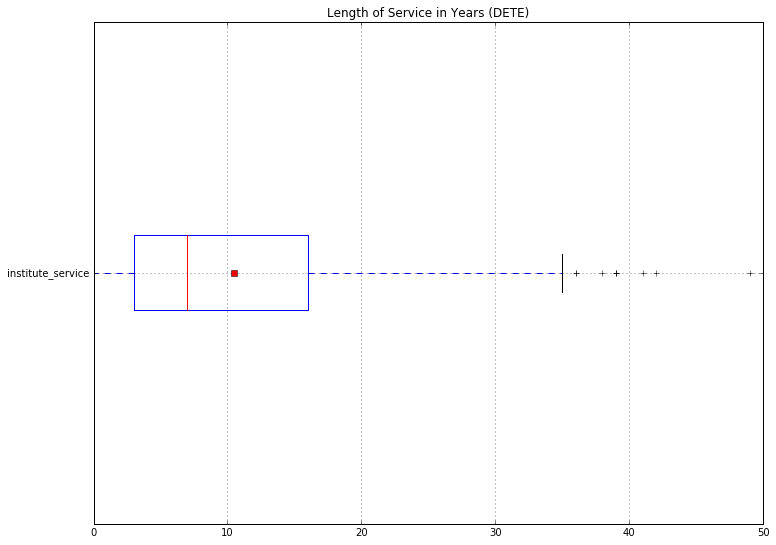

In [17]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

dete_resignations.boxplot(["institute_service"], figsize = (12, 9), vert = False, showmeans = True, grid = True).set_title("Length of Service in Years (DETE)")

In [18]:
print(tafe_resignations["institute_service"].value_counts())

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64


#### II. Dissatisfaction

We created a new `institute_service` column that we'll use to analyze survey respondents according to their length of employment. Next, we'll identify any employees who resigned because they were dissatisfied. We will choose the below columns as indicators of dissatisfaction. If the employee indicated any of the factors below caused them to resign, we'll mark them as _dissatisfied_ in a new column. To do this, we make use of the `DataFrame.any()` method.

1. __`tafe_survey_updated`__:
    - `Contributing Factors. Dissatisfaction`
    - `Contributing Factors. Job Dissatisfaction`
2. __`dete_survey_updated`__:
    - `job_dissatisfaction`
    - `dissatisfaction_with_the_department`
    - `physical_work_environment`
    - `lack_of_recognition`
    - `lack_of_job_security`
    - `work_location`
    - `employment_conditions`
    - `work_life_balance`
    - `workload`
    
The newly created `dissatisfied` column will contain the following:
- `True`: indicates a person resigned because they were dissatisfied with the job
- `False`: indicates a person resigned because of a reason other than dissatisfaction with the job
- `NaN`: indicates the value is missing

In [19]:
print(tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts())
print("\n")
print(tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [20]:
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == "-":
        return False
    else:
        return True

# Updating values in the two columns
tafe_resignations[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]] = tafe_resignations[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]].applymap(update_vals)

# Creating a calculated column
tafe_resignations["dissatisfied"] = tafe_resignations[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]].any(axis = 1, skipna = False)
tafe_resignations_up = tafe_resignations.copy()

# Checking values
tafe_resignations_up["dissatisfied"].value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

For `dete_resignations`, the columns to be used are already in boolean form so we can already create the new column.

In [21]:
col_list = ["job_dissatisfaction", "dissatisfaction_with_the_department",
            "physical_work_environment", "lack_of_recognition",
            "lack_of_job_security", "work_location",
            "employment_conditions", "work_life_balance", "workload"]

for col in col_list:
    print(dete_resignations[col].value_counts(dropna = False))
    print("\n")

False    270
True      41
Name: job_dissatisfaction, dtype: int64


False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64


False    305
True       6
Name: physical_work_environment, dtype: int64


False    278
True      33
Name: lack_of_recognition, dtype: int64


False    297
True      14
Name: lack_of_job_security, dtype: int64


False    293
True      18
Name: work_location, dtype: int64


False    288
True      23
Name: employment_conditions, dtype: int64


False    243
True      68
Name: work_life_balance, dtype: int64


False    284
True      27
Name: workload, dtype: int64




In [22]:
# Creating a calculated column
dete_resignations["dissatisfied"] = dete_resignations[col_list].any(axis = 1, skipna = False)
dete_resignations_up = dete_resignations.copy()

# Checking values
dete_resignations_up["dissatisfied"].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

### Combing the Datasets

To recap, we've accomplished the following:

- Renamed our columns
- Dropped any data not needed for our analysis
- Verified the quality of our data
- Created a new `institute_service` column
- Cleaned the `Contributing Factors` columns
- Created a new column indicating if an employee resigned because they were dissatisfied in some way

Now, we're finally ready to combine our datasets! Our end goal is to aggregate the data according to the `institute_service` column.

In [23]:
# Creating a variable to distinguish between the two
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)

# Getting counts of NA
combined.notnull().sum().sort_values(ascending = False)

institute                                              651
separationtype                                         651
id                                                     651
dissatisfied                                           643
cease_date                                             635
position                                               598
employment_status                                      597
age                                                    596
gender                                                 592
institute_service                                      563
Institute                                              340
WorkArea                                               340
Contributing Factors. Interpersonal Conflict           332
Contributing Factors. Job Dissatisfaction              332
Contributing Factors. Maternity/Family                 332
Contributing Factors. NONE                             332
Contributing Factors. Ill Health                       3

In [24]:
# Dropping columns with less than 500 non-null values
combined_updated = combined.dropna(thresh = 500, axis = 1).copy()

combined_updated[0:5]

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation
1,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation
2,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation
3,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation
4,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation


In [25]:
# List of retained fields
combined_updated.columns

Index(['age', 'cease_date', 'dissatisfied', 'employment_status', 'gender',
       'id', 'institute', 'institute_service', 'position', 'separationtype'],
      dtype='object')

### Further Cleaning of institute_service

As we can see below, when we merged the datasets, values in `tafe_resignations` were in the form of string labels describing the range of years of service, as opposed to `dete_resignations`' which we calculated earlier and gave us an exact year. 

In [26]:
combined_updated["institute_service"].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
11.0                   4
24.0                   4
23.0                   4
19.0                   3
21.0                   3
39.0                   3
32.0                   3
25.0                   2
26.0                   2
28.0                   2
30.0                   2
36.0                   2
27.0                   1


To analyze the data, we'll convert these numbers into categoriesbased on this [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

- New: Less than 3 years at a company
- Experienced: 3 to 6 years at a company
- Established: 7 to 10 years at a company
- Veteran: 11 or more years at a company

In [27]:
pattern = r"(\d+)"

combined_updated['institute_service_new'] = combined_updated['institute_service'].astype("str")
combined_updated['institute_service_new'] = combined_updated['institute_service_new'].str.extract(pattern, expand = False)
combined_updated['institute_service_new'] = combined_updated['institute_service_new'].astype("float")

combined_updated['institute_service_new'].value_counts().sort_values(ascending = False)

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
2.0      14
9.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
23.0      4
24.0      4
39.0      3
19.0      3
21.0      3
32.0      3
30.0      2
28.0      2
36.0      2
25.0      2
26.0      2
41.0      1
34.0      1
49.0      1
35.0      1
33.0      1
27.0      1
42.0      1
38.0      1
29.0      1
31.0      1
Name: institute_service_new, dtype: int64

In [28]:
def map_service(year):
    if pd.isnull(year):
        return np.nan
    elif year < 3:
        return "New"
    elif year >= 3 and year <= 6:
        return "Experienced"
    elif year >= 7 and year <= 10:
        return "Established"
    elif year >= 11:
        return "Veteran"
    
combined_updated["service_cat"] = combined_updated["institute_service_new"].apply(map_service)

# Checking calculated values
combined_updated["service_cat"].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

### Initial Analysis

The last few cleaning procedures we will be doing is filling in the missing values in the `dissatisfied` column.

Recall that the `dissatisfied column` consists of Boolean values, meaning they're either `True` or `False`. Methods such as the `df.pivot_table()` method actually treat Boolean values as integers, so a True value is considered to be 1 and a False value is considered to be 0. That means that we can aggregate the `dissatisfied` column and calculate the number of people in each group, the percentage of people in each group, etc.

According to the cell below, there are 8 null values. We will replace these with `False` for now since it occurs more times than `True` does.

In [29]:
print("Before .fillna")
print(combined_updated["dissatisfied"].value_counts(dropna = False))

combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)

print("\n")
print("After .fillna")
print(combined_updated["dissatisfied"].value_counts(dropna = False))

Before .fillna
False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64


After .fillna
False    411
True     240
Name: dissatisfied, dtype: int64


#### Percentage of Dissastified Employees by Years of Service

In [30]:
dis_pct = combined_updated.pivot_table(index = "service_cat", values = "dissatisfied")
dis_pct = dis_pct.sort_values("dissatisfied")
dis_pct

,dissatisfied
service_cat,
New,0.295337
Experienced,0.343023
Veteran,0.485294
Established,0.516129


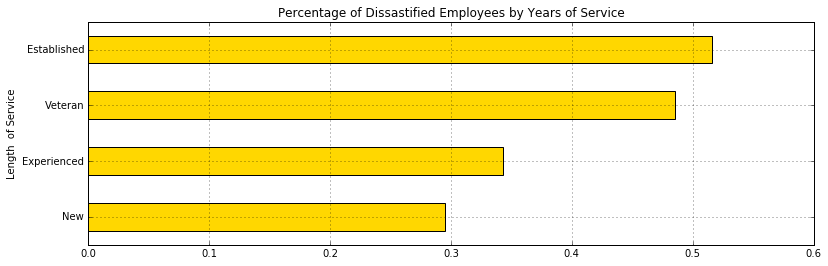

In [31]:
ax = dis_pct.plot(kind = 'barh', figsize = (13, 4), title = "Percentage of Dissastified Employees by Years of Service", 
                  grid = True, legend = False, color = "gold")

ax.set_ylabel("Length  of Service")

plt.show()

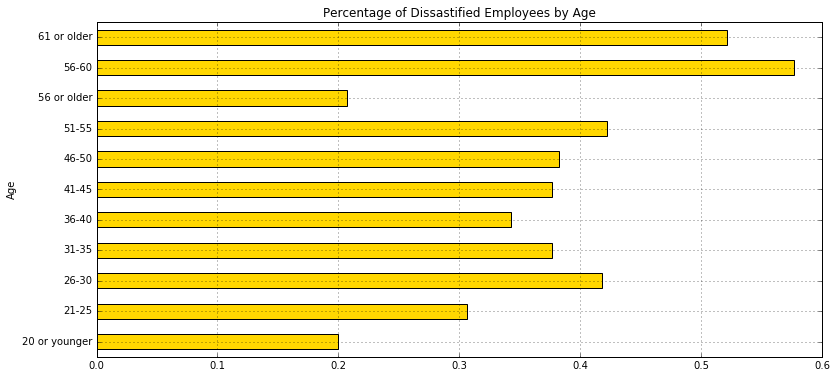

In [32]:
# Cleaning age column
combined_updated["dissatisfied_num"] = combined_updated["dissatisfied"].astype("int")

combined_updated["age"].value_counts()
combined_updated["age_new"] = combined_updated["age"].str.replace("  ", "-")

# Getting percentages bby length of service
age_pct = combined_updated.pivot_table(index = "age_new", values = "dissatisfied")
age_pct

ax2 = age_pct.plot(kind = "barh", figsize = (13, 6), sort_columns = True,
                   grid = True, color = "gold", legend = False,
                   title = "Percentage of Dissastified Employees by Age")
ax2.set_ylabel("Age")

## Conclusions

Let's now go back to our questions and try to answer them:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

    __A__: If we consider those classified as 'New' as those who've only worked for a short period of time, then dissatisfaction does not seem to be the main driver of resignations. The opposite is true, however, when we look at those who have worked for longer, where there is a direct relationship indicating that dissatisfaction was very much present on those who resigned.
---

2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

    __A__: There seems to be a weak trend where older employees are resigning due to dissatisfaction compared to younger employees.